In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc


In [57]:
# DataSet 1
movies_cols = ['movie_id', 'title', 'genre', 'director', 'actors']  # Add 'director' and 'actors' columns
movies = pd.read_csv(r'D:\code\machine learning\codesoft\data science\movies\movies.dat', sep='::', header=None, names=movies_cols, encoding='latin-1', engine='python')

In [58]:
# DataSet 2
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(r'D:\code\machine learning\codesoft\data science\movies\ratings.dat', sep='::', header=None, names=ratings_cols, engine='python', encoding='latin-1')

In [64]:
# DataSet 3
users_cols = ['user_id', 'gender', 'age', 'occupation', 'zip_code']
users = pd.read_csv(r'D:\code\machine learning\codesoft\data science\movies\users.dat', sep='::', header=None, names=users_cols, engine='python', encoding='latin-1')

# Merging the data

In [65]:
merge_on_movieid = pd.merge(movies, ratings, on='movie_id').reset_index(drop=True)
merge_on_userid = pd.merge(merge_on_movieid, users, on='user_id').reset_index(drop=True)

# Data Preprocessing

In [66]:
label_encoder = LabelEncoder()
merge_on_userid['genre_encoded'] = label_encoder.fit_transform(merge_on_userid['genre'])
merge_on_userid['director_encoded'] = label_encoder.fit_transform(merge_on_userid['director'])
merge_on_userid['actors_encoded'] = label_encoder.fit_transform(merge_on_userid['actors'])
merge_on_userid['gender_encoded'] = label_encoder.fit_transform(merge_on_userid['gender'])


# Exploratory Data Analysis
# Plotting the distribution of ratings

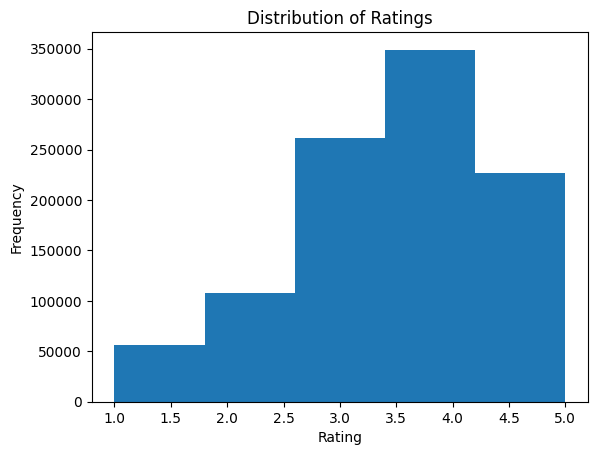

In [67]:
plt.hist(merge_on_userid['rating'], bins=5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

# Skipping the str accessor for rating column

In [68]:
merge_on_userid['rating'] = merge_on_userid['rating']

# Converting rating column to float

In [69]:
merge_on_userid['rating'] = merge_on_userid['rating'].astype(float)


# Plotting the correlation matrix of features and labels

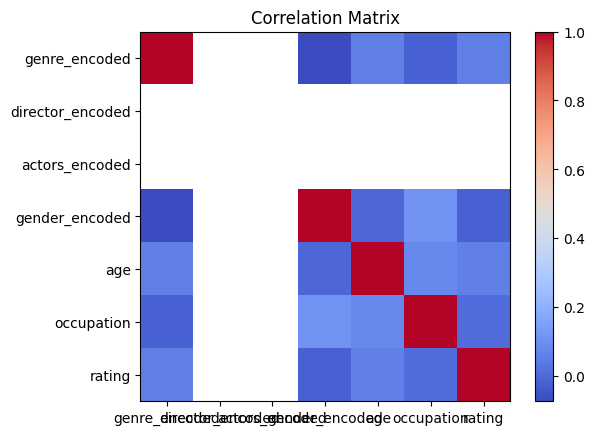

In [70]:
numeric_columns = ['genre_encoded', 'director_encoded', 'actors_encoded', 'gender_encoded', 'age', 'occupation', 'rating']
corr_matrix = merge_on_userid[numeric_columns].corr()
plt.imshow(corr_matrix, cmap='coolwarm')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

# Splitting the data into features (X) and labels (y)

In [82]:
X = merge_on_userid[['genre_encoded', 'director_encoded', 'actors_encoded']]
y = merge_on_userid['rating']



# Scaling the features to have zero mean and unit variance

In [83]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Building and Comparison
# Using three different linear models: Linear Regression, Ridge Regression and Lasso Regression

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Add Ridge and Lasso here
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc


models = [LogisticRegression(), Ridge(), Lasso()]
model_names = ['Logistic Regression', 'Ridge Regression', 'Lasso Regression']
mse_scores = []
r2_scores = []
cv_scores = []


In [90]:
for model in models:
    # Fitting the model on the training data
    model.fit(X_train, y_train)
    # Predicting on the test data
    y_pred = model.predict(X_test)
    # Calculating the mean squared error and r-squared score on the test data
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Calculating the cross validation score on the whole data using 5-fold cross validation
    cv_score = np.mean(cross_val_score(model, X_scaled, y, cv=5))
    # Appending the scores to the respective lists
    mse_scores.append(mse)
    r2_scores.append(r2)
    cv_scores.append(cv_score)

# Plotting the comparison of scores for different models 

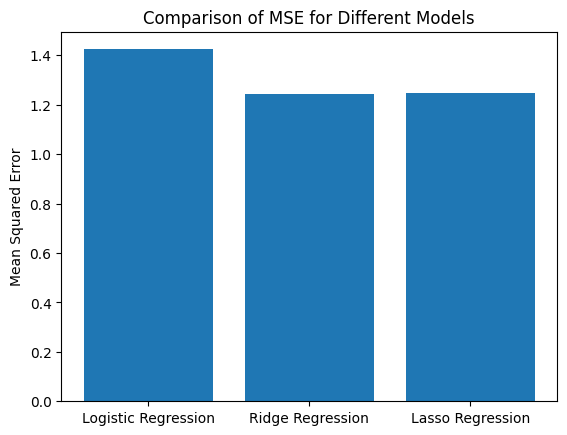

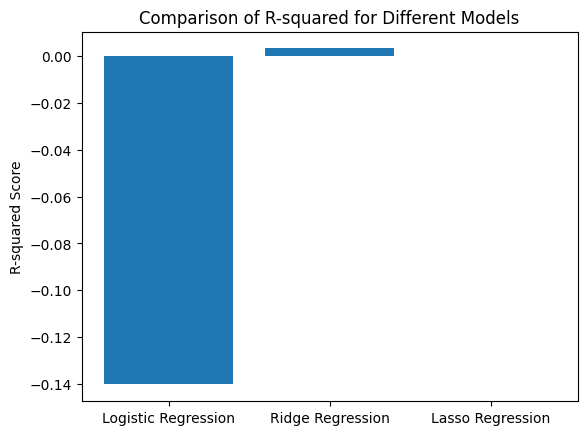

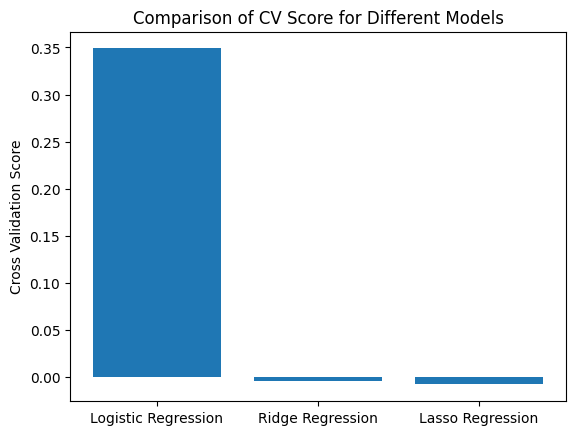

In [91]:
plt.bar(model_names, mse_scores)
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE for Different Models')
plt.show()

plt.bar(model_names, r2_scores)
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared for Different Models')
plt.show()

plt.bar(model_names, cv_scores)
plt.ylabel('Cross Validation Score')
plt.title('Comparison of CV Score for Different Models')
plt.show()


# Model Evaluation
# Choosing the best model based on the scores

In [92]:
best_model = models[np.argmax(cv_scores)]
best_model_name = model_names[np.argmax(cv_scores)]
print('The best model is:', best_model_name)

The best model is: Logistic Regression


In [93]:
# Predicting on the test data using the best model
y_pred = best_model.predict(X_test)
# Calculating the mean squared error and r-squared score on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 1.4243408884134332
R-squared: -0.14019766052531502


# Plotting the actual vs predicted ratings

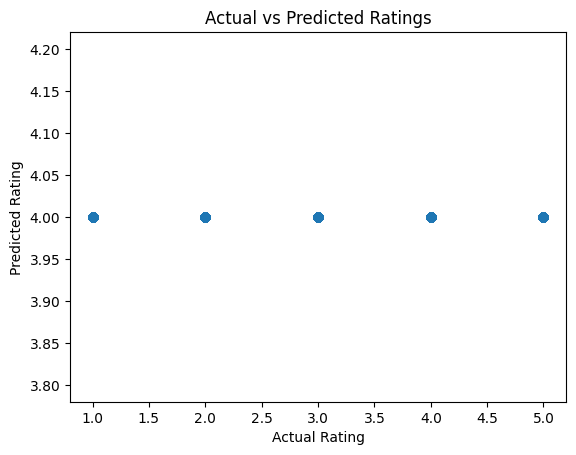

In [94]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings')
plt.show()

# Plotting the residuals

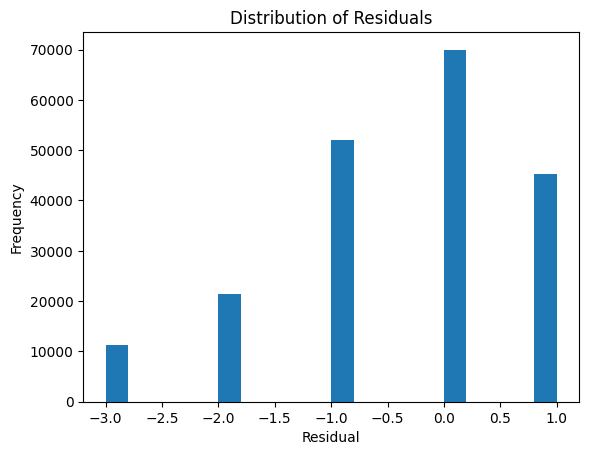

In [95]:
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Plotting the ROC curve and calculating the AUC score
# Converting the ratings to binary labels (1 for positive rating and 0 for negative rating)
# Assuming a positive rating is 4 or 5 and a negative rating is 1 or 2

AUC Score: 0.5328781731190617


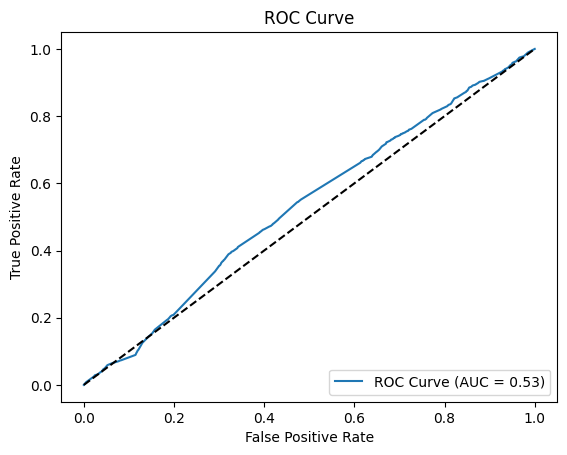

In [96]:
y_bin = np.where(y > 3, 1, 0)
# Splitting the data into training and testing sets for binary labels
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_scaled, y_bin, test_size=0.2, random_state=42)
# Fitting the best model on the training data for binary labels
best_model.fit(X_train_bin, y_train_bin)
# Predicting the probabilities on the test data for binary labels
y_prob = best_model.predict_proba(X_test_bin)[:, 1]
# Calculating the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_test_bin, y_prob)
# Calculating the area under the curve
auc_score = auc(fpr, tpr)
print('AUC Score:', auc_score)
# Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()